# Linda Türkmen


# BIL 366 Data Mining: Homework-2
### Bilinmesi gerekenler
distance measures, preprocessing (aggregation, cleaning, sampling),
pandas,numpy, matplotlib.pyplot
### Öğrenme Hedefleri 
Pandas kullanılarak distance measureler kullanılarak data benzerliğinin ölçülmesi ve outlier detection, sampling ile sample size'ın küçültülmesi ve ne kadar sample size'ın datayı ne kadar temsil ettiğinin gözlemlenmesi.


### Giriş
Covid süresince Türkiye location datasından Google'in elde etmiş olduğu mobility datası https://www.google.com/covid19/mobility/ sitesi üzerinden yayınlanmıştır.
Bu ödevde sizden bu datayla ilgili önanaliz yapıp raporlamanız istenmektedir. Datayı indirme ve yüklemede bir bütünlük olması açısından bu datayı drive üzerinden erişime açtım, aşağıdaki şekilde erişebilirsiniz.



In [1]:
import pandas as pd
from scipy.spatial import distance

#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20.info()

df21 = pd.read_csv(url2021)
df21.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

In [2]:
#df20

### Yapılacaklar
1. Yukarıdaki data framede içerisinde data olmayan (tüm sütun null), sütunları çıkarınız. 



In [3]:
#len(df21.index)
#len(df20.index)

print(len(df20.columns),len(df21.columns))
df20Copy = df20.copy()
df21Copy = df21.copy()

15 15


In [4]:
#soru1

In [5]:

df20Drop = df20Copy.dropna(how='all', axis=1)
df21Drop = df21Copy.dropna(how='all', axis=1) #tüm değeleri null olan sütunu drop ettim.
                                              #axis = 1, sütun bazlı işlem yapabilmek için
                                              #how = "all" ile tüm sütunu null olanları seçiyorum sadece
print("Columns-df20: ",len(df20.columns),", İndex-df20: ",len(df20.index))
print("Columns-df21: ",len(df21.columns),", İndex-df21: ",len(df21.index))

print("\nnew-Columns-df20Drop: ",len(df20Drop.columns),", İndex-df20Drop: ",len(df20Drop.index))
print("new-Columns-df21Drop: ",len(df21Drop.columns),", İndex-df21Drop: ",len(df21Drop.index))



Columns-df20:  15 , İndex-df20:  167657
Columns-df21:  15 , İndex-df21:  158430

new-Columns-df20Drop:  13 , İndex-df20Drop:  167657
new-Columns-df21Drop:  13 , İndex-df21Drop:  158430


2. Mahalanobis distance distributiondan uzaklığı ölçtüğü için outlier belirlenmesinde kullanılabilir.2020 ve 2021 her iki datayıda aylara göre gruplandırdıktan(mean kullanabilirsiniz) sonra (aggregation) her bir satır ile data (tüm sütun) arasındaki Mahalanobis distance'ı hesaplayarak yeni bir sütun olarak ekleyiniz ve buradaki en büyük elemanın outlier olduğunu 2020 ve 2021 yılları için ayrı ayrı gösteriniz. 

In [6]:
#Distance ölçümü için 
#covariance matrisini numpy.cov() fonksiyonu, 
#inverse (tersini) numpy.linalg.inv() fonksiyonu 
#ve aşağıdaki scipy fonksiyonunu kullanabilirsiniz: 
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html 
import numpy as np #np.cov(), np.linalg.inv()
from scipy.spatial import distance


In [7]:
#2020
date20= pd.to_datetime(df20Copy['date']) 
index20 = pd.DatetimeIndex(date20.values).month 
dframe20= df20Copy.set_index(index20) 
dframe20.index.name = 'Aylar' 
dframe20= dframe20.iloc[:, 9:15]
gr20 = dframe20.groupby('Aylar').mean()

In [8]:
import pandas as pd
import scipy as sp
import numpy as np

def mahalanobis_distance(u, v):
    mu = u - np.mean(v) #(xp-xp2)
    
    covaryans = np.cov(v.values.T)
    inv = np.linalg.inv(covaryans) #cov matrisin terisini alıyoruz
    dot = np.dot(mu, inv) # iç çarpım ((xp-xp2)^T).C^-1
    mahalanobis = np.dot(dot, mu.T)# ((xp-xp2)^T).C^-1.(xp-xp2)
    return mahalanobis.diagonal()

df20mahal= gr20[gr20.columns]
df20mahal['mahalanobis_distance20'] = mahalanobis_distance(df20mahal, gr20[gr20.columns])
df20mahal

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahalanobis_distance20
Aylar,,,,,,,
2,2.028130,3.238759,4.509374,-6.643751,9.353484,-0.698443,6.799677
3,-21.700010,-4.395083,-6.153226,-22.896115,-12.652553,6.332819,2.515010
4,-63.148836,-26.497847,-42.117354,-64.418867,-47.539997,20.742720,8.602830
5,-55.673896,-15.239506,-28.837900,-58.020520,-41.539711,17.455508,8.229767
6,-18.156210,12.410230,32.502002,-17.117761,-10.425022,4.339668,7.663963
7,-6.876458,15.260359,55.750799,-1.882360,-10.858957,-0.082189,3.050788
8,-9.014545,9.800086,60.977582,1.375155,-16.412747,-0.669343,6.643364
9,-13.071653,10.092360,38.977984,-11.851192,-11.053215,2.389219,1.514244
10,-13.590351,19.569650,30.077698,-10.521094,-8.295500,3.886670,5.844341


In [9]:
mahal_col = df20mahal.iloc[:,6]
outlier20 =  mahal_col.max()
print("Outlier20:",outlier20)

Outlier20: 8.60282963278472


In [10]:
#2021
date21= pd.to_datetime(df21Copy['date']) 
index21 = pd.DatetimeIndex(date21.values).month 
dframe21= df21Copy.set_index(index21) 
dframe21.index.name = 'Aylar' 
dframe21= dframe21.iloc[:, 9:15]
gr21 = dframe21.groupby('Aylar').mean()


In [11]:
#2021 mahalanobis_distance

def mahalanobis_distance(u, v):
    mu = u - np.mean(v) #(xp-xp2)
    
    covaryans = np.cov(v.values.T)
    inv = np.linalg.inv(covaryans) #cov matrisin terisini alıyoruz
    dot = np.dot(mu, inv) # iç çarpım ((xp-xp2)^T).C^-1
    mahalanobis = np.dot(dot, mu.T)# ((xp-xp2)^T).C^-1.(xp-xp2)
    return mahalanobis.diagonal()

df21mahal= gr21[gr21.columns]
df21mahal['mahalanobis_distance21'] = mahalanobis_distance(df21mahal,gr21[gr21.columns])
df21mahal

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahalanobis_distance21
Aylar,,,,,,,
1,-50.178609,-4.892954,-34.120820,-40.967841,-31.960336,13.586489,6.529720
2,-41.179696,10.830794,-22.787913,-31.025378,-25.911408,9.778199,5.917862
3,-24.850222,24.720614,-8.019031,-20.468370,-13.891509,6.377278,2.885326
4,-35.502006,21.478576,-13.863790,-27.611852,-23.792819,11.048254,6.946990
5,-41.302671,13.629981,-11.967062,-31.783479,-33.632010,12.395152,6.527793
6,1.851735,47.980315,39.925513,8.431063,-10.437586,0.311459,5.306735
7,26.966805,61.709726,86.983643,40.417973,-17.413158,-2.827990,6.314734
8,26.708902,58.990142,73.931242,34.897984,-8.252919,-2.106539,5.860010
9,24.913273,62.677302,52.151012,25.758633,-0.748786,-1.655904,3.008164


In [12]:
mahal_col = df21mahal.iloc[:,6]
outlier21 =  mahal_col.max()
print("Outlier21:",outlier21)

Outlier21: 6.946989542677499



3. 2020 ve 2021 datalarını aylara göre grupladıktan sonra (mean değerleri ile) en az iki adet fark/benzerlik ölçümü (**slaylatlardaki similarity measures**) kullanarak 2020 ve 2021 datalarının 9-14 sütun verilerinin **aynı aylarda** birbirlerine ne oranda benzediğini bulunuz.



In [13]:
df20copy = df20.copy()
df21copy = df21.copy()

In [14]:
date20= pd.to_datetime(df20copy['date']) 
index20 = pd.DatetimeIndex(date20.values).month 
dframe20= df20copy.set_index(index20) 
dframe20.index.name = 'Aylar' 
dframe20= dframe20.iloc[:, 9:15]


In [15]:
date21= pd.to_datetime(df21copy['date']) 
index21 = pd.DatetimeIndex(date21.values).month 
dframe21= df21copy.set_index(index21) 
dframe21.index.name = 'Aylar' 
dframe21= dframe21.iloc[:, 9:15]




In [16]:
#3.soru

from numpy import dot
from numpy.linalg import norm
from math import*
from decimal import Decimal

for i in range(len(dframe20.columns)):
    
    col20  = dframe20.iloc[:,i].groupby('Aylar').mean()
    col21  = dframe21.iloc[:,i].groupby('Aylar').mean()
    
    x = col20.iloc[0:9] #2-10 ayları
    y = col21.iloc[1:10] #2-10 ayları (her iki dataframe'deki ortak aylar)
    
    
    cosine_similarity = distance.cosine(x,y) #iki vektör arasındaki benzerlik 
    print("{}.Sütun, Cosine Similarity: {}".format(i+9,cosine_similarity))
    
    def jaccard_similarity(x,y): #değerler arasındaki kesişim oranlarını hesaplar
        intersection = len(set.intersection(*[set(x), set(y)])) #kesişim noktaları
        union        = len(set.union(*[set(x), set(y)]))        #toplam noktaları
        return intersection/float(union)
    print("{}.Sütun, Jaccard Similarity: {}".format(i+9,jaccard_similarity(x,y)))
 
    euclidean_distance = distance.euclidean(x, y) #L2-norm
    print("{}.Sütun, Euclidean Distance: {}".format(i+9,euclidean_distance))
    
    minkowski_distance = distance.minkowski(x,y, 4) #L4-norm'u hesaplar #Lp norm
    print("{}.Sütun, Minkowski Distance: {}".format(i+9,minkowski_distance))
    
    chebyshev_distance = distance.chebyshev(x,y)  #L- (+∞) norm #max elemanı seçer 
    print("{}.Sütun, Chebyshev Distance: {}\n".format(i+9,chebyshev_distance))
    

9.Sütun, Cosine Similarity: 0.5196070020667009
9.Sütun, Jaccard Similarity: 0.0
9.Sütun, Euclidean Distance: 91.89709873235667
9.Sütun, Minkowski Distance: 57.682677622384965
9.Sütun, Chebyshev Distance: 43.207825818808956

10.Sütun, Cosine Similarity: 0.4844422070452292
10.Sütun, Jaccard Similarity: 0.0
10.Sütun, Euclidean Distance: 119.87480498967801
10.Sütun, Minkowski Distance: 73.65794880249517
10.Sütun, Chebyshev Distance: 52.58494215228433

11.Sütun, Cosine Similarity: 0.0800703143416226
11.Sütun, Jaccard Similarity: 0.0
11.Sütun, Euclidean Distance: 57.75101818216762
11.Sütun, Minkowski Distance: 38.95900142754679
11.Sütun, Chebyshev Distance: 31.232843856080272

12.Sütun, Cosine Similarity: 0.5461793794887388
12.Sütun, Jaccard Similarity: 0.0
12.Sütun, Euclidean Distance: 93.24392813674798
12.Sütun, Minkowski Distance: 57.19373765870677
12.Sütun, Chebyshev Distance: 42.30033220309397

13.Sütun, Cosine Similarity: 0.2539478784290894
13.Sütun, Jaccard Similarity: 0.0
13.Sütun, E

4. 2020 datasından (50-1000) aralığında farklı büyüklüklerde samplelar oluşturarak aylık mean değerlerin ortalama ne kadar değiştiğini grafikle gösteriniz (x sample size, y ortalama değişim): **Açıklama**▶
Tüm datanın aylık ortalama değerleri ile sample datanın aylık ortalama değerleri arasındaki farkların mutlak değerlerini toplayarak ortalamasını almanız gerekiyor. Bu şekilde her bir sample için bir hata datası elde etmiş oluyorsunuz. Sonra bunları x axisde sample size, y axisde hata olacak şekilde grafiklemeniz istenmektedir.

In [17]:
#df20 üzerinde aylar göre gruplama

df2020 = df20.copy()
date20df= pd.to_datetime(df2020['date']) 
index20df = pd.DatetimeIndex(date20df.values).month 
dframe20df= df2020.set_index(index20df) 
dframe20df.index.name = 'Aylar' 
dframe20df= dframe20df.iloc[:, 9:15].fillna(0)

In [18]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

x=[] #sample_size'ları tutan liste

dfsample = []  
error_list = []
 
    
for i in np.arange(50, 1000, 100):  

    df20sample = df2020.sample(n = i)
    dfsample.append(df20sample)
    x.append(i) #sample_size #x_ekseni
    
    print("Sample: {}".format(i))
    date20sample   = pd.to_datetime(df20sample['date']) 
    index20sample  = pd.DatetimeIndex(date20sample.values).month 
    dframe20sample = df20sample.set_index(index20sample) 
    dframe20sample.index.name = 'Aylar' 
    dframe20sample = dframe20sample.iloc[:, 9:15].fillna(0)
    

    for i in range(11):
        
        rowSample = dframe20sample.groupby('Aylar').mean()
        rowDf = dframe20df.groupby('Aylar').mean()
 
        print("{}.Ay ".format(i+2))

        for j in range(len(rowSample.index)):
            topla = 0
            sample_error = []
            
            
            md1 = []   
            md = abs((rowDf.iloc[i].mean())-(rowSample.iloc[i].mean())) 
            md1.append(md)
            topla = topla + md
  
            
            error = topla/len(md1)
                   
        error_list.append(error) #
        print("Ortalama Hata: ",error)
                  
      
    print("---------------------")     

    
print("Sample List: ",x) #x: sample_size'ların listesi 


Sample: 50
2.Ay 
Ortalama Hata:  1.3909528437225234
3.Ay 
Ortalama Hata:  6.803301628949382
4.Ay 
Ortalama Hata:  17.23174280213529
5.Ay 
Ortalama Hata:  10.382275814633308
6.Ay 
Ortalama Hata:  2.104936544621498
7.Ay 
Ortalama Hata:  0.4337343915343914
8.Ay 
Ortalama Hata:  7.910180614901036
9.Ay 
Ortalama Hata:  1.3059064408661856
10.Ay 
Ortalama Hata:  0.4234648706760258
11.Ay 
Ortalama Hata:  1.42420127899556
12.Ay 
Ortalama Hata:  6.625042653910823
---------------------
Sample: 150
2.Ay 
Ortalama Hata:  3.1201582673885877
3.Ay 
Ortalama Hata:  4.5394127400604924
4.Ay 
Ortalama Hata:  2.088885659278148
5.Ay 
Ortalama Hata:  5.830993763351257
6.Ay 
Ortalama Hata:  1.5440830632216396
7.Ay 
Ortalama Hata:  1.1958952380952383
8.Ay 
Ortalama Hata:  1.0938927361131576
9.Ay 
Ortalama Hata:  7.1107602258004805
10.Ay 
Ortalama Hata:  0.9892335420223861
11.Ay 
Ortalama Hata:  0.9455688003630804
12.Ay 
Ortalama Hata:  5.000561210823477
---------------------
Sample: 250
2.Ay 
Ortalama Hata:  0

In [19]:
error_list #tüm hataları tutan liste

[1.3909528437225234,
 6.803301628949382,
 17.23174280213529,
 10.382275814633308,
 2.104936544621498,
 0.4337343915343914,
 7.910180614901036,
 1.3059064408661856,
 0.4234648706760258,
 1.42420127899556,
 6.625042653910823,
 3.1201582673885877,
 4.5394127400604924,
 2.088885659278148,
 5.830993763351257,
 1.5440830632216396,
 1.1958952380952383,
 1.0938927361131576,
 7.1107602258004805,
 0.9892335420223861,
 0.9455688003630804,
 5.000561210823477,
 0.625713822944143,
 2.257304431656679,
 2.1629940399699663,
 3.638557518700022,
 1.7019600071026402,
 2.357006349206349,
 4.77335113113071,
 2.151144536104281,
 0.8305033832922271,
 0.7853123901066708,
 0.18606845720029064,
 0.08747852882649654,
 6.256426628949382,
 3.6369440665515818,
 0.46560914796663866,
 0.5582818461831001,
 0.31420577200577204,
 4.822680614901035,
 1.6842896375651863,
 4.062646240435084,
 0.7660816208759007,
 1.7964132847864995,
 0.92081186215983,
 2.525758200110448,
 0.7113466287590171,
 2.7288352964778078,
 1.28378269

In [20]:
y1 = (sum(error_list[0:11])/11) #sample_50 error  #11 ay sayısı kadar 
y2 = (sum(error_list[11:22])/11) #sample_150 error
y3 = (sum(error_list[22:33])/11) #sample_250 error
y4 = (sum(error_list[33:44])/11) #sample_350 error
y5 = (sum(error_list[44:55])/11) #sample_450 error
y6 = (sum(error_list[55:66])/11) #sample_550 error
y7 = (sum(error_list[66:77])/11) #sample_650 error
y8 = (sum(error_list[77:88])/11) #sample_750 error
y9 = (sum(error_list[88:99])/11) #sample_850 error
y10 = (sum(error_list[99:110])/11) #sample_950 error


print("error_list:[{},{},{},{},{},{},{},{},{},{}]".format(y1,y2,y3,y4,y5,y6,y7,y8,y9,y10))
print("\nsample_size", x)

error_list:[5.09415817135873,3.0417677496834497,1.9518105515830888,2.2228233990042434,1.497245711824295,1.3735084552449885,0.9934619761558888,1.483968315593411,1.0969711928711672,1.1499990029403737]

sample_size [50, 150, 250, 350, 450, 550, 650, 750, 850, 950]


Text(0, 0.5, 'Error Label')

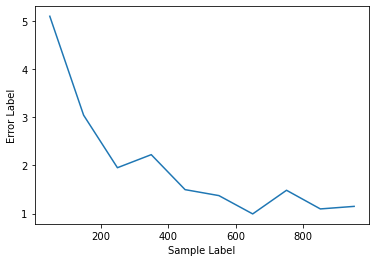

In [21]:
y= [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]
plt.plot(x,y)

#plt.titel("Sample-Error ")
plt.xlabel("Sample Label")
plt.ylabel("Error Label")

5. 2020 datasından her aydan (50-1000) aralığında olacak şekilde samplelar oluşturarak aylık mean değerlerin ortalama ne kadar değiştiğini grafikle gösteriniz (x sample size, y ortalama değişim): **Açıklama**▶ Bu soruda her bir aydan eşit miktarda sampller alarak sample oluşturmanız (mesela 50 için her bir aydan 50şer satır alarak, aysayısı x 50 büyüklüğünde bir sample elde etmiş oluyorsunuz) ve 4.sorudaki gibi ortalama hatayı bularak yine sample size'a göre grafiklemeniz istenmektedir.  

In [30]:
#df20 üzerinde aylar göre gruplama

df2020 = df20.copy()
date20df= pd.to_datetime(df2020['date']) 
index20df = pd.DatetimeIndex(date20df.values).month 
dframe20df= df2020.set_index(index20df) 
dframe20df.index.name = 'Aylar' 
dframe20df= dframe20df.iloc[:, 9:15].fillna(0)
#dframe20df
df_index= dframe20df.groupby('Aylar').mean()


In [31]:
#50 sample
dframe_50 = []
rows= []
error =0
for i in range(len(df_index.index)):
    d_sample = dframe20df.iloc[lambda x: x.index == i+2].sample(n = 50) #indexleri aylara çevirdikten sonra, 
                                                                        #her aydan 50 sample alıyorum
    t = d_sample.mean()
    dframe_50.append(t) #dframe_50: her bir aydan 50 satırlık sample içeriryor 
                                #totel'de 11 (2-12 ayları) tane df oluşturmuş oldum. 11x50    
     
    rowsample = d_sample.groupby('Aylar').mean()
    rows.append(rowsample)
    
d_20 = dframe20df.sample(n = 50) #Esas df'den sample_size 50 olacak şekilde oluşturuyorum
rowdf = d_20.groupby('Aylar').mean()


error_total = []
for i in range(len(rowdf.index)):
    erroriay = abs(rowdf.iloc[i,:]-rows[i].mean())  #aylara göre hata değeri(mutlak hata)
    error_total.append(erroriay.mean())             #hatalar bir listeye atandı
    print("{}.Ay, Error: {}".format(i+2,erroriay.mean()))
    
    
sample50_error = (np.sum(error_total))/len(error_total) #totalde elde dilen hataların ortalaması alındı 
print("\nsample-50 Error: ",sample50_error)


2.Ay, Error: 3.7599999999999993
3.Ay, Error: 11.557777777777778
4.Ay, Error: 6.823333333333333
5.Ay, Error: 20.400000000000002
6.Ay, Error: 4.527619047619049
7.Ay, Error: 4.800000000000001
8.Ay, Error: 5.2122222222222225
9.Ay, Error: 8.041666666666666
10.Ay, Error: 10.793333333333335
11.Ay, Error: 3.984074074074074
12.Ay, Error: 7.828333333333333

sample-50 Error:  7.975305435305436


In [32]:
#100 sample
dframe_100 = []
rows= []
error =0
for i in range(len(df_index.index)):
    d_sample = dframe20df.iloc[lambda x: x.index == i+2].sample(n = 100)
    t = d_sample.mean()
    dframe_100.append(t) #dframe_100: her bir aydan 100 satırlık sample içeriryor 
                                #totel'de 11 (2-12 ayları) tane df oluşturmuş oldum. 11x100    
     
    rowsample = d_sample.groupby('Aylar').mean()
    rows.append(rowsample)
    
d_20 = dframe20df.sample(n = 100) #Esas df'den sample_size 50 olacak şekilde oluşturuyorum
rowdf = d_20.groupby('Aylar').mean()


error_total = []
for i in range(len(rowdf.index)):
    erroriay = abs(rowdf.iloc[i,:]-rows[i].mean())  #aylara göre hata değeri(mutlak hata)
    error_total.append(erroriay.mean())             #hatalar bir listeye atandı
    print("{}.Ay, Error: {}".format(i+2,erroriay.mean()))
    
    
sample100_error = (np.sum(error_total))/len(error_total) #totalde elde dilen hataların ortalaması alındı 
print("\nsample-100 Error: ",sample100_error)

2.Ay, Error: 3.258333333333334
3.Ay, Error: 2.140833333333333
4.Ay, Error: 7.334999999999998
5.Ay, Error: 8.752222222222224
6.Ay, Error: 9.324444444444442
7.Ay, Error: 16.870151515151516
8.Ay, Error: 3.4150000000000005
9.Ay, Error: 5.97
10.Ay, Error: 6.40590909090909
11.Ay, Error: 3.8106410256410257
12.Ay, Error: 5.166212121212121

sample-100 Error:  6.586249735113371


In [33]:
#250 sample
dframe_250 = []
rows= []
error =0
for i in range(len(df_index.index)):
    d_sample = dframe20df.iloc[lambda x: x.index == i+2].sample(n = 250)
    t = d_sample.mean()
    dframe_250.append(t) #dframe_250: her bir aydan 250 satırlık sample içeriryor 
                                #totel'de 11 (2-12 ayları) tane df oluşturmuş oldum. 11x250    
     
    rowsample = d_sample.groupby('Aylar').mean()
    rows.append(rowsample)
    
d_20 = dframe20df.sample(n = 250) #Esas df'den sample_size 250 olacak şekilde oluşturuyorum
rowdf = d_20.groupby('Aylar').mean()


error_total = []
for i in range(len(rowdf.index)):
    erroriay = abs(rowdf.iloc[i,:]-rows[i].mean())  #aylara göre hata değeri
    error_total.append(erroriay.mean())             #hatalar bir listeye atandı
    print("{}.Ay, Error: {}".format(i+2,erroriay.mean()))
    
    
sample250_error = (np.sum(error_total))/len(error_total)  #totalde elde dilen hataların ortalaması alındı 
print("\nsample-250 Error: ",sample250_error)

2.Ay, Error: 1.6921904761904758
3.Ay, Error: 2.5224731182795694
4.Ay, Error: 3.0691111111111127
5.Ay, Error: 4.531478260869567
6.Ay, Error: 3.0177777777777774
7.Ay, Error: 2.976919540229885
8.Ay, Error: 3.8318181818181816
9.Ay, Error: 7.116873563218391
10.Ay, Error: 1.5880000000000003
11.Ay, Error: 2.750666666666666
12.Ay, Error: 4.388031746031746

sample-250 Error:  3.4077582220175797


In [34]:
dframe_550 = []
rows= []
error =0
for i in range(len(df_index.index)):
    d_sample = dframe20df.iloc[lambda x: x.index == i+2].sample(n = 550)
    t = d_sample.mean()
    dframe_550.append(t) #dframe_550: her bir aydan 550 satırlık sample içeriryor 
                                #totel'de 11 (2-12 ayları) tane df oluşturmuş oldum. 11x550    
     
    rowsample = d_sample.groupby('Aylar').mean()
    rows.append(rowsample)
    
d_20 = dframe20df.sample(n = 550) #Esas df'den sample_size 550 olacak şekilde oluşturuyorum
rowdf = d_20.groupby('Aylar').mean()


error_total = []
for i in range(len(rowdf.index)):
    erroriay = abs(rowdf.iloc[i,:]-rows[i].mean()) 
    error_total.append(erroriay.mean())
    print("{}.Ay, Error: {}".format(i+2,erroriay.mean()))
    
    
sample550_error = (np.sum(error_total))/len(error_total)
print("\nsample-550 Error: ",sample550_error)


2.Ay, Error: 2.2684848484848485
3.Ay, Error: 2.1246815089672233
4.Ay, Error: 3.335447154471545
5.Ay, Error: 6.880303030303029
6.Ay, Error: 2.092334455667789
7.Ay, Error: 2.7637927663734114
8.Ay, Error: 1.7037395228884595
9.Ay, Error: 2.315486782720825
10.Ay, Error: 2.093780174627632
11.Ay, Error: 1.3679731743666173
12.Ay, Error: 1.14957157784744

sample-550 Error:  2.554144999701711


In [35]:
dframe_850 = []
rows= []
error =0
for i in range(len(df_index.index)):
    d_sample = dframe20df.iloc[lambda x: x.index == i+2].sample(n = 850)
    t = d_sample.mean()
    dframe_850.append(t) #dframe_850: her bir aydan 850 satırlık sample içeriryor 
                                #totel'de 11 (2-12 ayları) tane df oluşturmuş oldum. 11x850    
     
    rowsample = d_sample.groupby('Aylar').mean()
    rows.append(rowsample)
    
d_20 = dframe20df.sample(n = 850) #Esas df'den sample_size 850 olacak şekilde oluşturuyorum
rowdf = d_20.groupby('Aylar').mean()


error_total = []
for i in range(len(rowdf.index)):
    erroriay = abs(rowdf.iloc[i,:]-rows[i].mean()) 
    error_total.append(erroriay.mean())
    print("{}.Ay, Error: {}".format(i+2,erroriay.mean()))
    
    
sample850_error = (np.sum(error_total))/len(error_total)
print("\nsample-850 Error: ",sample850_error)


2.Ay, Error: 1.5309740670461736
3.Ay, Error: 1.2601145912910618
4.Ay, Error: 4.4059663865546215
5.Ay, Error: 3.1141394335511983
6.Ay, Error: 0.9291300428217264
7.Ay, Error: 1.2889743589743587
8.Ay, Error: 2.0921978021978025
9.Ay, Error: 2.239346405228758
10.Ay, Error: 1.436998305495037
11.Ay, Error: 2.319607843137255
12.Ay, Error: 2.4741219564748973

sample-850 Error:  2.0992337447975356


In [36]:
dframe_1000 = []
rows= []
error =0
for i in range(len(df_index.index)):
    d_sample = dframe20df.iloc[lambda x: x.index == i+2].sample(n = 1000)
    t = d_sample.mean()
    dframe_1000.append(t) #dframe_50: her bir aydan 50 satırlık sample içeriryor 
                                #totel'de 11 (2-12 ayları) tane df oluşturmuş oldum. 11x1000    
     
    rowsample = d_sample.groupby('Aylar').mean()
    rows.append(rowsample)
    
d_20 = dframe20df.sample(n = 1000) #Esas df'den sample_size 50 olacak şekilde oluşturuyorum
rowdf = d_20.groupby('Aylar').mean()


error_total = []
for i in range(len(rowdf.index)):
    erroriay = abs(rowdf.iloc[i,:]-rows[i].mean()) 
    error_total.append(erroriay.mean())
    print("{}.Ay, Error: {}".format(i+2,erroriay.mean()))
    
    
sample1000_error = (np.sum(error_total))/len(error_total)
print("\nsample-1000 Error: ",sample1000_error)

2.Ay, Error: 1.5171274509803923
3.Ay, Error: 1.399425925925926
4.Ay, Error: 2.8331386430678465
5.Ay, Error: 2.533072463768116
6.Ay, Error: 0.901166666666667
7.Ay, Error: 3.2531538461538463
8.Ay, Error: 1.2795303030303031
9.Ay, Error: 1.1288734939759035
10.Ay, Error: 2.025508771929825
11.Ay, Error: 1.5546116838487969
12.Ay, Error: 1.9173205128205135

sample-1000 Error:  1.8493572511061942


Text(0, 0.5, 'Error Label')

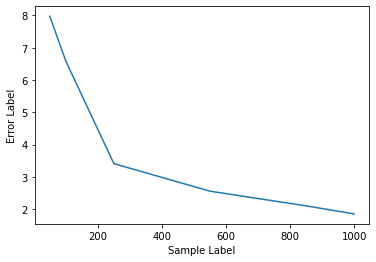

In [37]:
import matplotlib.pyplot as plt 

x= [50,100,250,550,850,1000]
y = [sample50_error,sample100_error, sample250_error, sample550_error, sample850_error, sample1000_error]

plt.plot(x,y)
plt.xlabel("Sample Label")
plt.ylabel("Error Label")